<h1> <center>Data Integration & Visualization </center></h1>
                                        

# ![title](airplaneimage.jpg)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
airlinesDf = pd.read_csv("airlines.csv")

In [3]:
airportsDf = pd.read_csv("airports.csv")

In [4]:
flightsDf= pd.read_csv("flights.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11252\17542411.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flightsDf= pd.read_csv("flights.csv")


<h2>Data Integration </h2> 
<h5>First we will merge flights table with the airlines table on column Airline from flights and column IATA from airlines</h5>

In [5]:
tempmerge = pd.merge(flightsDf,airlinesDf, left_on= 'AIRLINE',right_on='IATA_CODE')

<h5>Then we will merge the output table with the airports table on the common column Origin Airport from tempmerge and IATA from airpot</h5>

In [6]:
tempmerge2 = pd.merge(tempmerge,airportsDf,left_on='ORIGIN_AIRPORT',right_on= 'IATA_CODE')

<h5>Then we will merge the output table with the airports table on the common column Destination Airport from tempmerge2 and IATA from airpot</h5>

In [7]:
df = pd.merge(tempmerge2,airportsDf,left_on='DESTINATION_AIRPORT',right_on= 'IATA_CODE')

<h2>Data Cleaning</h2>

<h4>First we will rename some of the columns to make it easier for us to read</h4>

In [8]:
df.rename(columns={'CITY_x': 'ORIGIN_CITY','AIRLINE_x':'AIRLINE','STATE_x':'ORIGIN_STATE',
'LATITUDE_x':'ORIGIN_LATITUDE','LONGITUDE_x':'ORIGIN_LONGITUDE','CITY_y': 'DESTINATION_CITY',
'STATE_y':'DESTINATION_STATE','LATITUDE_y':'DESTINATION_LATITUDE',
'LONGITUDE_y':'DESTINATION_LONGITUDE'},inplace=True)

<h4>The first feature that we are going to add is the date column we will use the values in the day,month,and year columns and combine them in a single column and later we will drop them</h4>

In [9]:
df["DATE"] = df['YEAR'].astype(str) +"-"+ df["MONTH"].astype(str) + "-" + df['DAY'].astype(str)

In [10]:
df['DATE'] = pd.to_datetime(df['DATE'])

<h4>First we will drop unused columns and the columns that has many null values</h4>

In [11]:
df.drop(['DAY','MONTH','YEAR','DAY_OF_WEEK','IATA_CODE_x','TAIL_NUMBER','IATA_CODE_y','IATA_CODE','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY',
'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIRLINE_y','AIRPORT_x','AIRPORT_y','COUNTRY_y','COUNTRY_x'],axis=1,inplace=True)

<h4>Now we will drop any row that has any null values</h4>

In [12]:
df = df.dropna(thresh=25)

<h4>The Second feature is the speed of the aircraft we used the distance column and the air time column to calculate the speed of the aircraft</h4>

In [13]:
df["AIRCRAFT_SPEED"] = df['DISTANCE'] / df["AIR_TIME"]

In [32]:
df['AIRLINE'].value_counts()

WN    1140884
DL     795754
AA     637522
OO     529394
EV     511182
UA     461519
MQ     257726
B6     240906
US     194586
AS     157268
NK     105197
F9      82141
HA      69277
VX      55923
Name: AIRLINE, dtype: int64

In [34]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing 

AIRLINE                  0.000000
FLIGHT_NUMBER            0.000000
ORIGIN_AIRPORT           0.000000
DESTINATION_AIRPORT      0.000000
SCHEDULED_DEPARTURE      0.000000
DEPARTURE_TIME           0.000000
DEPARTURE_DELAY          0.000000
TAXI_OUT                 0.000000
WHEELS_OFF               0.000000
SCHEDULED_TIME           0.000000
ELAPSED_TIME             0.000000
AIR_TIME                 0.199779
DISTANCE                 0.000000
WHEELS_ON                0.000000
TAXI_IN                  0.000000
SCHEDULED_ARRIVAL        0.000000
ARRIVAL_TIME             0.000000
ARRIVAL_DELAY            0.225375
DIVERTED                 0.000000
CANCELLED                0.000000
ORIGIN_CITY              0.000000
ORIGIN_STATE             0.000000
ORIGIN_LATITUDE          0.087054
ORIGIN_LONGITUDE         0.087054
DESTINATION_CITY         0.000000
DESTINATION_STATE        0.000000
DESTINATION_LATITUDE     0.087207
DESTINATION_LONGITUDE    0.087207
DATE                     0.000000
AIRCRAFT_SPEED

In [37]:
df['ORIGIN_CITY'].value_counts()

Chicago              355592
Atlanta              343826
Dallas-Fort Worth    232390
Houston              195403
Denver               193828
                      ...  
St Cloud                 78
Dillingham               77
Gustavus                 76
King Salmon              63
Ithaca                   30
Name: ORIGIN_CITY, Length: 308, dtype: int64

In [36]:
# flights = df['FLIGHT_NUMBER'].unique()
# for i in range(len(flights)):


#     flight = df['FLIGHT_NUMBER']== flights[i]

#     flightMean = df.loc[flight]['ELAPSED_TIME'].mean()

#     rows = df.loc[flight]
#     rows.loc[rows['ELAPSED_TIME'].isnull(),'ELAPSED_TIME'] = flightMean

#     df.loc[flight,'ELAPSED_TIME'] = rows

In [ ]:

# for i in range(len(flights)):


#     flight = df['FLIGHT_NUMBER']== flights[i]

#     flightMean = df.loc[flight]['AIR_TIME'].mean()

#     rows = df.loc[flight]
#     rows.loc[rows['AIR_TIME'].isnull(),'AIR_TIME'] = flightMean

#     df.loc[flight,'AIR_TIME'] = rows

In [ ]:
# for i in range(len(flights)):


#     flight = df['FLIGHT_NUMBER']== flights[i]

#     flightMean = df.loc[flight]['ARRIVAL_DELAY'].mean()

#     rows = df.loc[flight]
#     rows.loc[rows['ARRIVAL_DELAY'].isnull(),'ARRIVAL_DELAY'] = flightMean

#     df.loc[flight,'ARRIVAL_DELAY'] = rows

In [ ]:
flights = df['ORIGIN_CITY'].unique()
for i in range(len(flights)):


    flight = df['ORIGIN_CITY']== flights[i]

    flightMean = df.loc[flight]['AIR_TIME'].mean()

    rows = df.loc[flight]
    rows.loc[rows['AIR_TIME'].isnull(),'AIR_TIME'] = flightMean

    df.loc[flight,'AIR_TIME'] = rows

<h4>Now we will search for outliers </h4>

<h5>After reviewing all graphs for outliers these were the 8 features that didnt have outliers </h5>

Text(0.5, 1.0, 'AIRCRAFT_SPEED')

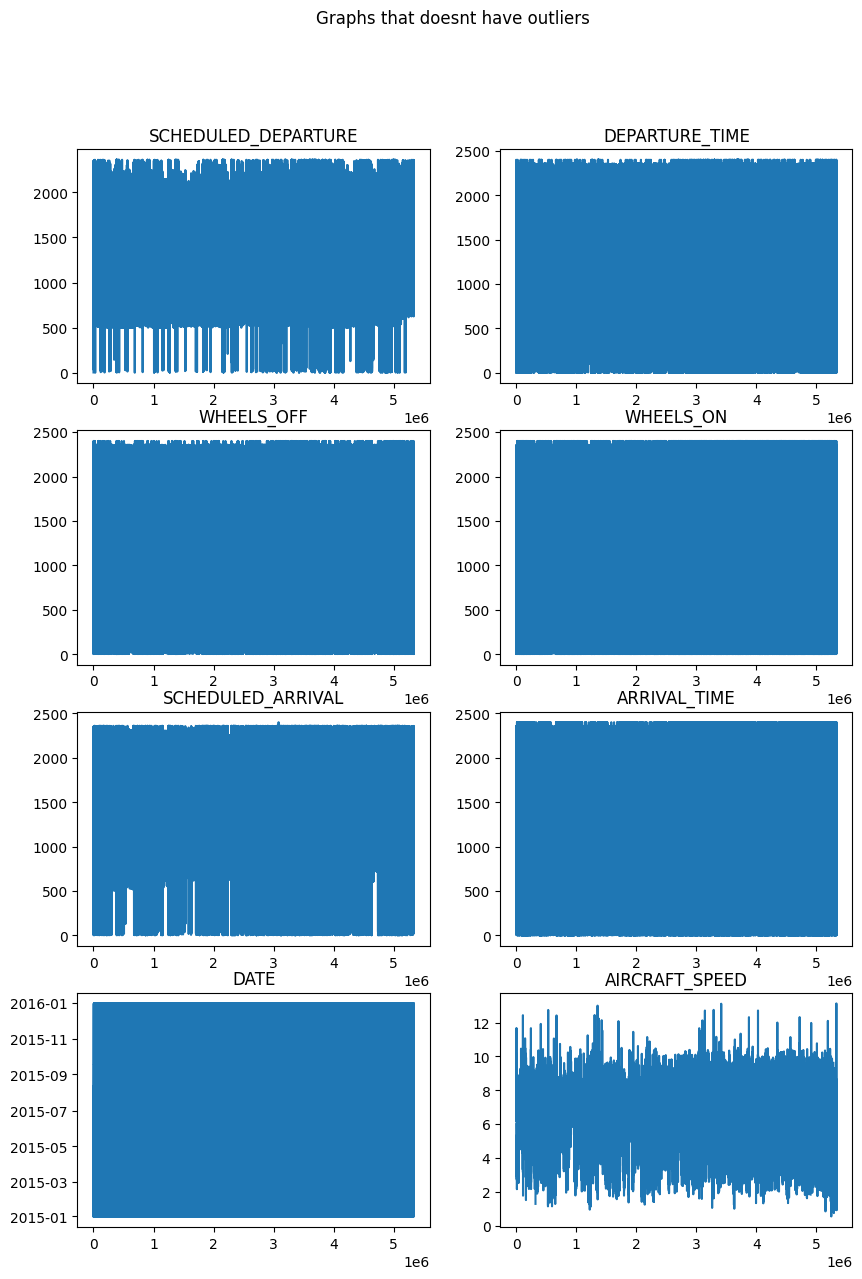

In [17]:
fig, axs = plt.subplots(4,2)
fig.set_figwidth(10)
fig.set_figheight(14)
fig.suptitle('Graphs that doesnt have outliers')
axs[0][0].plot(df['SCHEDULED_DEPARTURE'])
axs[0, 0].set_title('SCHEDULED_DEPARTURE')

axs[0][1].plot(df['DEPARTURE_TIME'])
axs[0, 1].set_title('DEPARTURE_TIME')

axs[1][0].plot(df['WHEELS_OFF'])
axs[1, 0].set_title('WHEELS_OFF')

axs[1][1].plot(df['WHEELS_ON'])
axs[1, 1].set_title('WHEELS_ON')

axs[2][0].plot(df['SCHEDULED_ARRIVAL'])
axs[2, 0].set_title('SCHEDULED_ARRIVAL')

axs[2][1].plot(df['ARRIVAL_TIME'])
axs[2, 1].set_title('ARRIVAL_TIME')

axs[3][0].plot(df['DATE'])
axs[3, 0].set_title('DATE')

axs[3][1].plot(df['AIRCRAFT_SPEED'])
axs[3, 1].set_title('AIRCRAFT_SPEED')


<h3>Now we will remove all the outliers</h3>

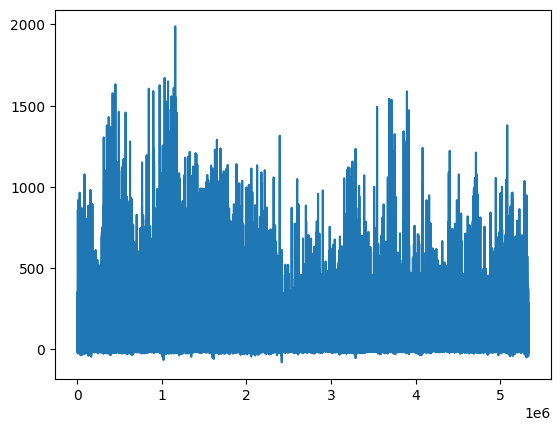

In [18]:
plt.plot(df['DEPARTURE_DELAY'])

<h5>We dropped all the rows that had a DEPARTURE_DELAY greater than 1700  </h5>

In [19]:
df = df.drop(df[df.DEPARTURE_DELAY >= 1700].index)

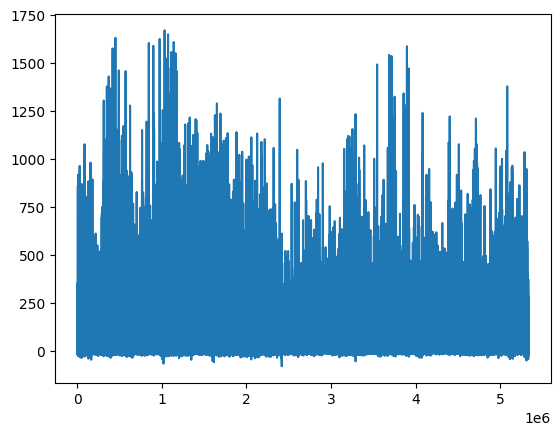

In [20]:
plt.plot(df['DEPARTURE_DELAY']) 

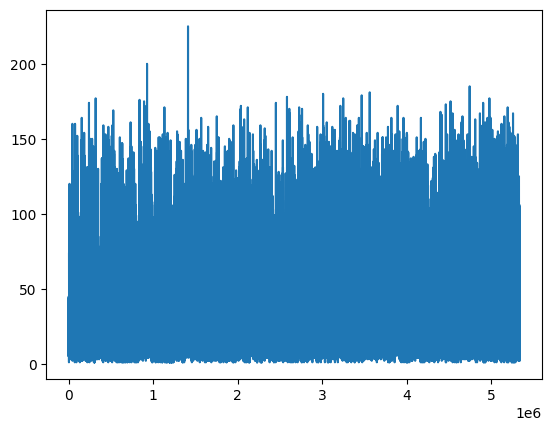

In [21]:
plt.plot(df['TAXI_OUT'])

<h5>We dropped all the rows that had a TAXI_OUT greater than 180  </h5>

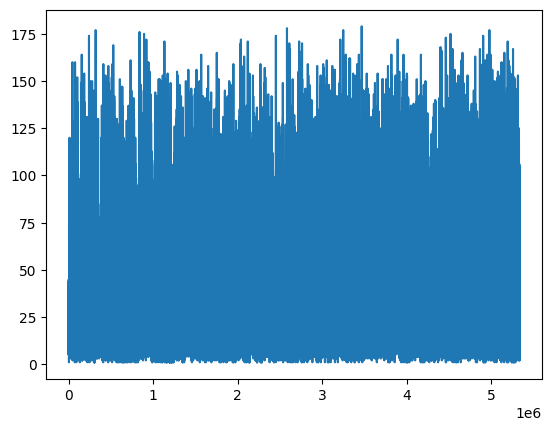

In [22]:
df = df.drop(df[df.TAXI_OUT >= 180].index)
plt.plot(df['TAXI_OUT']) 

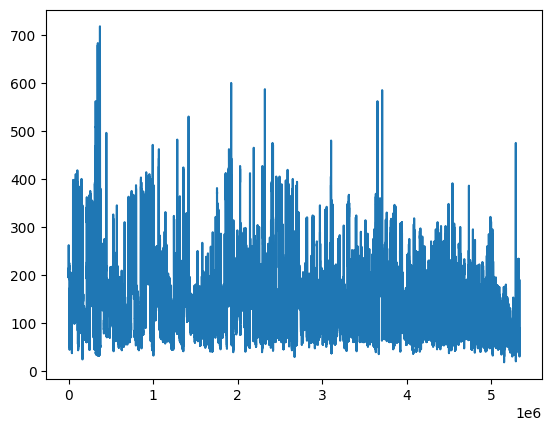

In [23]:
plt.plot(df['SCHEDULED_TIME'])

<h5>We dropped all the rows that had a SCHEDULED_TIME greater than 500  </h5>

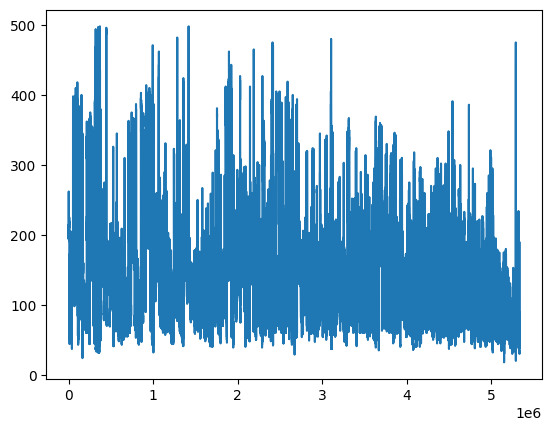

In [24]:
df = df.drop(df[df.SCHEDULED_TIME >= 500].index)
plt.plot(df['SCHEDULED_TIME']) 

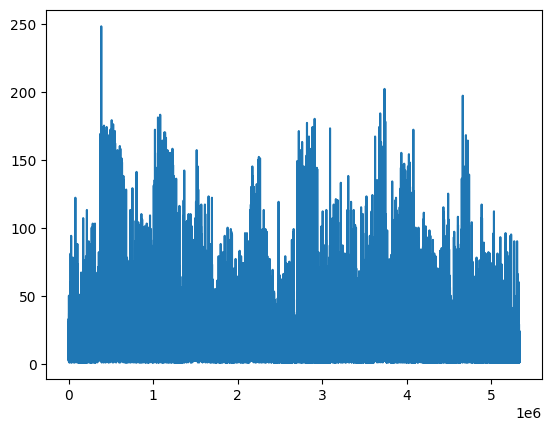

In [25]:
plt.plot(df['TAXI_IN'])# remove above 200

<h5>We dropped all the rows that had a TAXI_IN greater than 200  </h5>

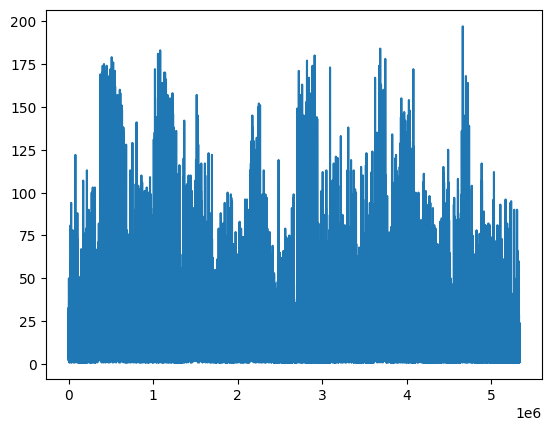

In [26]:
df = df.drop(df[df.TAXI_IN >= 200].index)
plt.plot(df['TAXI_IN']) 